# Spotify Song Genre Prediction
W207

Group Members: Ivan Escalona, Daisy Khamphakdy, Iris Lew, Shuo Wang, Amanda Teschko

Objective (problem statement):

Dataset: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

Model: 

---


**Features Definitions:**
*   **Danceability** - how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*   **Energy** - a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
*   **Key** - estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
*   **Loudness** - overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
*   **Mode** - the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
*   **Speechiness** - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
*   **Acousticness** - a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   **Instrumentalness** - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. (THIS MIGHT BE A PREDICTION AND ALGORITHM FROM SPOTIFY**)
*   **Liveness** - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
*   **Time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
*   **Duration_ms** - The duration of the track in milliseconds.
*   **Valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*   **Tempo** - the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**References:**
1.   https://www.kaggle.com/code/pelinsoylu/spotify-popularity-prediction-ml-practice

---







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## Load Data

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
raw_df = pd.read_csv('/content/gdrive/My Drive/genres_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Exploratory Data Analysis

In [ ]:
# Check first few rows of the dataset. 
raw_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
# Check the number of rows and columns.
raw_df.shape

(42305, 22)

In [ ]:
# Check genre column as our analysis will focus on genres.
raw_df["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

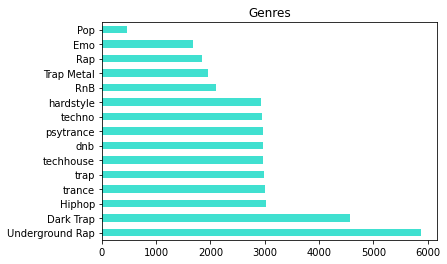

In [ ]:
#Plot the above date from genre column in bar plot for better vizualization
raw_df["genre"].value_counts().plot(kind="barh",color=["turquoise"],title="Genres");

####Check Missing Data:

In [ ]:
#Check missing data
print("----------- Columns with missing data ------------")
for col in raw_df.columns:
    pct_missing = raw_df[col].isnull().sum()/len(raw_df[col])*100
    if pct_missing > 0:
        print("Column:", col, "       % of records missing:", "{0:.2f}%".format(pct_missing))

print("\n----------- Count of columns with N/A ------------")
raw_df.isna().sum()

----------- Columns with missing data ------------
Column: song_name        % of records missing: 49.13%
Column: Unnamed: 0        % of records missing: 50.88%
Column: title        % of records missing: 50.88%

----------- Count of columns with N/A ------------


danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

####Check Song Name:
(IL MOVED)

In [ ]:
raw_df["song_name"].value_counts().sort_index()

"Enough."                           1
"Life"                              2
"Quarter Century Freestyle"         1
"The Take Over, The Breaks Over"    3
"You said you love me..."           1
                                   ..
• Tales                             1
ムスティネ                               1
泳 (Yong)                            1
ꞌCosmicꞌ.m4a                        2
행복                                  1
Name: song_name, Length: 15439, dtype: int64

In [ ]:
raw_df["song_name"].value_counts(ascending=False,dropna=False)

NaN               20786
Forever              14
Lost                 12
Alone                11
Revenge              11
                  ...  
Salary                1
Patek Philippe        1
ForceQuit             1
Red Nose              1
Can't Hold On         1
Name: song_name, Length: 15440, dtype: int64

In [ ]:
# Show the percentage of repeated words in song_name 
repeatSongNamePercent = raw_df['song_name'].value_counts(normalize=True)
repeatSongNamePercent.head(50)


Forever                                               0.000651
Lost                                                  0.000558
Runaway                                               0.000511
Revenge                                               0.000511
Scars                                                 0.000511
Numb                                                  0.000511
PTSD                                                  0.000511
Hollow                                                0.000511
Alone                                                 0.000511
Leave Me Alone                                        0.000465
Lonely                                                0.000465
Intro                                                 0.000418
Falling                                               0.000418
Energy                                                0.000418
Beautiful                                             0.000418
Perfect                                               0

####Drop NA data:
(IL CHANGED)

In [ ]:
# Drop columns: 'Unnamed: 0', song_names, 'title' because of NA
# Drop uri, track_href, analysis_url, type because of redundancy
df = raw_df.drop(['Unnamed: 0','title', "uri", "track_href", "analysis_url", "song_name", "type"], axis=1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap


There are missing values in the last three columns, so we have decided to drop the columns 'Unnamed: 0' and 'title'. Since our focus is on genres, it will not heavily impact our prediction and analysis.

In [ ]:
print("---------Unique values per Column----------")
df.nunique().sort_values(ascending=False)

---------Unique values per Column----------


id                  35877
duration_ms         26261
tempo               15606
loudness            11654
instrumentalness     4757
acousticness         4602
liveness             1695
valence              1674
speechiness          1447
energy                917
danceability          890
genre                  15
key                    12
time_signature          4
mode                    2
dtype: int64

In [ ]:
# Check the data types in our dataframe.
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
duration_ms           int64
time_signature        int64
genre                object
dtype: object

In [ ]:
print("--------Types of Columns--------")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = list(df.select_dtypes(include=numerics).columns)

categorical_cols = list(df.select_dtypes(exclude=numerics).columns)

# Move some numeric to categorical
switch_cols = ['mode', 'key']
numeric_cols = [i for i in numeric_cols if i not in (switch_cols)]
categorical_cols.extend(switch_cols)


print(len(numeric_cols), "numeric columns:", numeric_cols)
print()
print(len(categorical_cols),"categorical columns:", categorical_cols)

#Perhaps move time_signature into categorical and one hot encoding than numerical


--------Types of Columns--------
11 numeric columns: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

4 categorical columns: ['id', 'genre', 'mode', 'key']


In [ ]:
print("----------Numeric Column Summary Stats-------------")
df[numeric_cols].describe().transpose()

----------Numeric Column Summary Stats-------------


,count,mean,std,min,25%,50%,75%,max
danceability,42305.0,0.639364,0.156617,0.065100,0.52400,0.64600,0.766,0.988
energy,42305.0,0.762516,0.183823,0.000243,0.63200,0.80300,0.923,1.000
loudness,42305.0,-6.465442,2.941165,-33.357000,-8.16100,-6.23400,-4.513,3.148
speechiness,42305.0,0.136561,0.126168,0.022700,0.04910,0.07550,0.193,0.946
acousticness,42305.0,0.096160,0.170827,0.000001,0.00173,0.01640,0.107,0.988
instrumentalness,42305.0,0.283048,0.370791,0.000000,0.00000,0.00594,0.722,0.989
liveness,42305.0,0.214079,0.175576,0.010700,0.09960,0.13500,0.294,0.988
valence,42305.0,0.357101,0.233200,0.018700,0.16100,0.32200,0.522,0.988
tempo,42305.0,147.474056,23.844623,57.967000,129.93100,144.97300,161.464,220.290
duration_ms,42305.0,250865.846685,102957.713571,25600.000000,179840.00000,224760.00000,301133.000,913052.000


In [ ]:
# De-dupe IL ADDED
df.drop_duplicates() #39087
df.drop_duplicates(subset='id') #35877


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,0.502,0.991,5,-4.333,0,0.2400,0.005540,0.000198,0.4700,0.0797,150.029,4PMqy2vJjmv6ydGVqtCqPW,200000,4,hardstyle
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,46bXU7Sgj7104ZoXxzz9tM,269208,4,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,72DAt9Lbpy9EUS29OzQLob,234823,4,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,6HXgExFVuE1c3cq9QjFCcU,323200,4,hardstyle


In [ ]:
# De-dupe IL ADDED
# df[df.duplicated()].sort_values(by="id")
test = df.drop_duplicates()
test[test.duplicated(subset="id")].sort_values(by="id")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
11399,0.853,0.726,3,-7.414,0,0.0728,0.36200,0.000329,0.1100,0.821,136.073,00RaykzZO1vFk3eSSxHYHV,140251,4,Trap Metal
4625,0.853,0.726,3,-7.414,0,0.0728,0.36200,0.000329,0.1100,0.821,136.073,00RaykzZO1vFk3eSSxHYHV,140251,4,Underground Rap
11862,0.583,0.915,4,-2.191,1,0.4640,0.09360,0.000000,0.3480,0.628,179.836,00bEP3V5Ova0ihFnLUFbK2,138757,4,Trap Metal
14796,0.899,0.509,9,-8.040,1,0.3870,0.00157,0.000000,0.0573,0.599,150.001,00ko9WaS4jOX1kEk3gvHjf,225924,4,Rap
8918,0.756,0.453,8,-9.965,1,0.3180,0.00390,0.000000,0.6320,0.114,140.132,00p85inzGeXRXgqDVn7Ftq,144380,4,Underground Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18567,0.800,0.633,8,-4.875,0,0.0514,0.09010,0.000000,0.0315,0.836,191.906,7zL9xrz5krsuC6qVNluQQw,203360,4,Hiphop
14171,0.699,0.558,11,-7.622,1,0.0603,0.46200,0.000000,0.1160,0.493,79.992,7zLYKWcXnYeHHWidalz7rj,165000,4,Rap
10486,0.732,0.625,1,-11.517,0,0.2820,0.01380,0.000092,0.7030,0.196,134.922,7zSGKAncFa0CeZ5N6ZQqNm,142310,4,Trap Metal
11905,0.655,0.948,8,-4.338,1,0.4160,0.46200,0.000025,0.0835,0.690,159.897,7zShdWNBUXsUoU3akjRVHW,108004,4,Trap Metal


In [ ]:
# De-dupe IL ADDED
df[df.id=="00bEP3V5Ova0ihFnLUFbK2"]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
1362,0.583,0.915,4,-2.191,1,0.464,0.0936,0.0,0.348,0.628,179.836,00bEP3V5Ova0ihFnLUFbK2,138757,4,Dark Trap
11862,0.583,0.915,4,-2.191,1,0.464,0.0936,0.0,0.348,0.628,179.836,00bEP3V5Ova0ihFnLUFbK2,138757,4,Trap Metal


In [ ]:
# De-dupe IL ADDED
df = df.drop_duplicates()

In [ ]:
# ID duplicates, randomly sample one of them
df = df.groupby('id', group_keys=False).apply(lambda x: x.sample(1))

####Histograms of Song Characteristics and Number of Occurances:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Bar graph of song characteristics and the occurance')

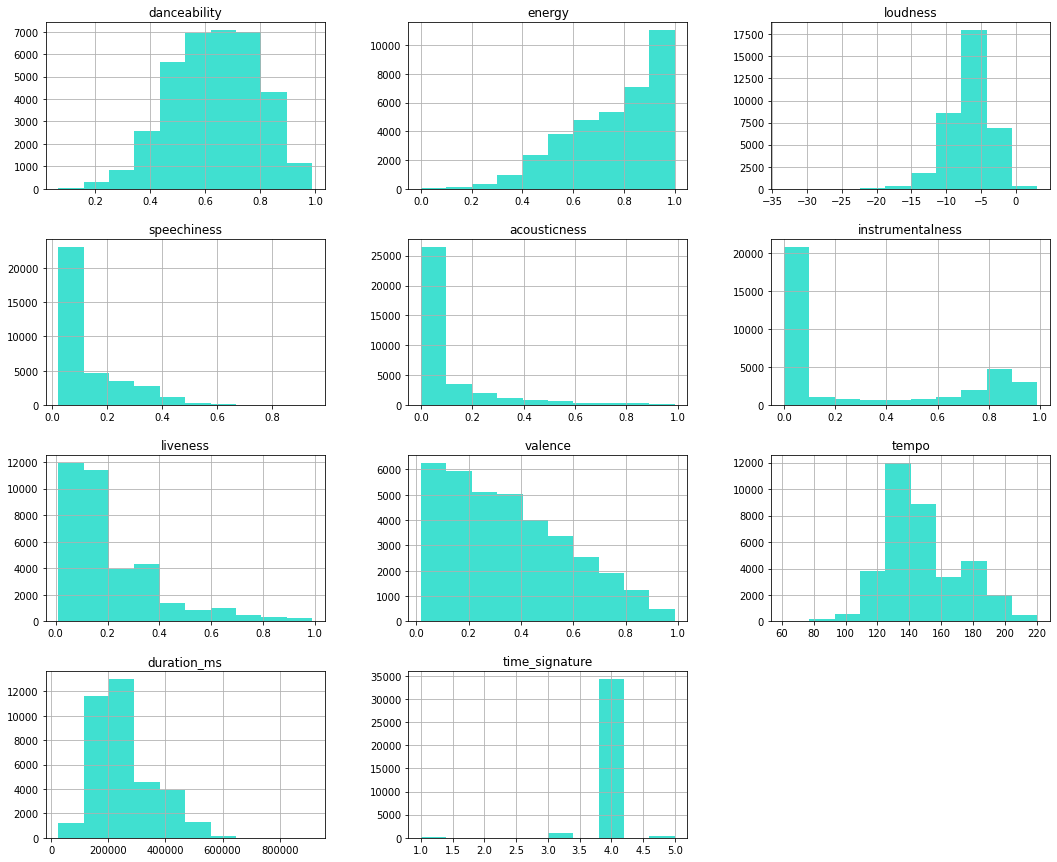

In [ ]:
fig = plt.figure(figsize = (18,15))
ax = fig.gca()
df[numeric_cols].hist(ax = ax, bins=10, color ='turquoise')
plt.title('Bar graph of song characteristics and the occurance')

Observations of the Histograms above:

CHARACTERISTICS |VALUE RANGE | OBSERVATIONS |
-|-|-|
Danceability|0-1|mean = 0.63|
Energy|0-1|as the value increases, occurance increases|
Key|0-11|...|
Loudness|-10 to -3|...|
Mode|0 or 1|...|
Speechiness|0-1|as the speech decreases, occurance increases|
Acousticness|0-1|as value increases, occurance decreases|
Instrumentalness|0-1|slight peak from 0.8 to 0.95|
Liveness|0-1|...|
Valence|0-1|as value increases, occurance decreases|
Tempo|70-220|...|
Duration_ms|0-800,000 milliseconds|...|
Time_signature|it has only 3 values (3,4,5)|max occurance is 4|

####Identify Correlations with Heatmap:

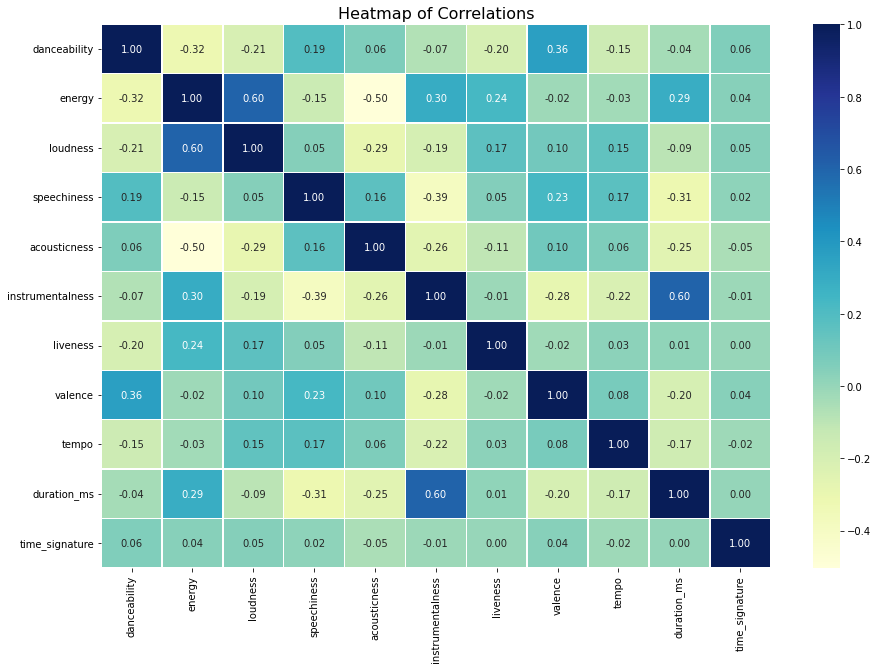

In [ ]:
correlation_mat =df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(15,10))   
plt.title('Heatmap of Correlations', fontsize=16)
sns.heatmap(correlation_mat, annot = True, ax=ax, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

Observations of the Heatmap Correlations:

*   Highest positive correlation = Energy and Loudness (0.6).  Colinearity here bc defintion is that energy is included in loudness. Instrumentalness & duration also might be colinearity
*   Lowest positive correlation = Loudness & Acousticness (-0.5)



  
####Bar Graphs of Genres and Song Characteristics:

<Figure size 1440x720 with 0 Axes>

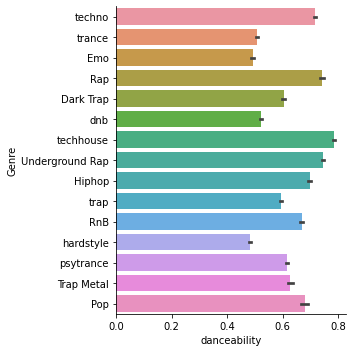

<Figure size 1440x720 with 0 Axes>

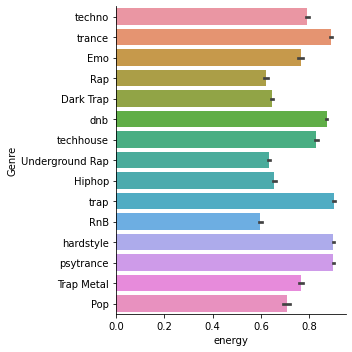

<Figure size 1440x720 with 0 Axes>

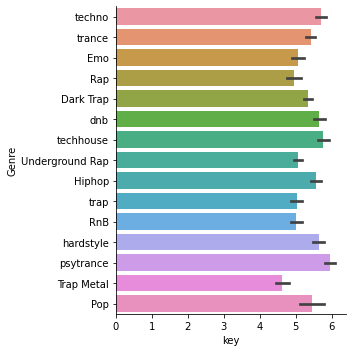

<Figure size 1440x720 with 0 Axes>

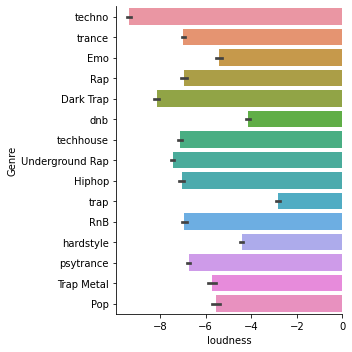

<Figure size 1440x720 with 0 Axes>

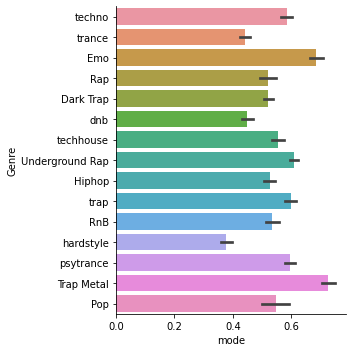

<Figure size 1440x720 with 0 Axes>

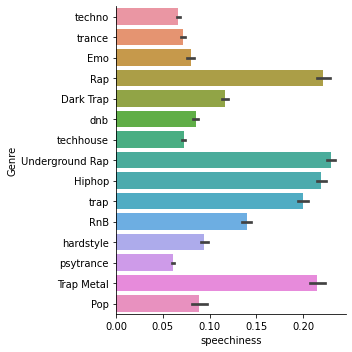

<Figure size 1440x720 with 0 Axes>

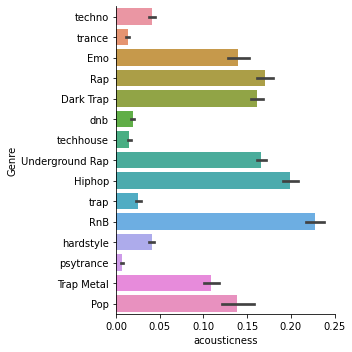

<Figure size 1440x720 with 0 Axes>

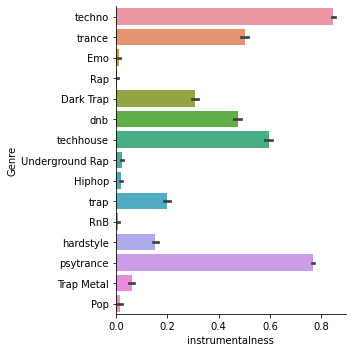

<Figure size 1440x720 with 0 Axes>

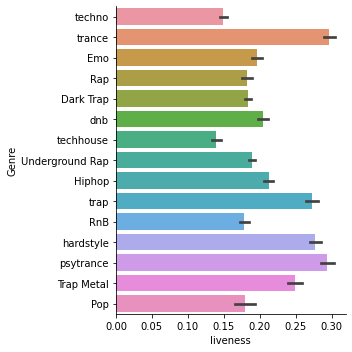

<Figure size 1440x720 with 0 Axes>

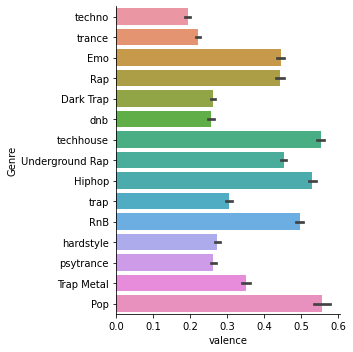

<Figure size 1440x720 with 0 Axes>

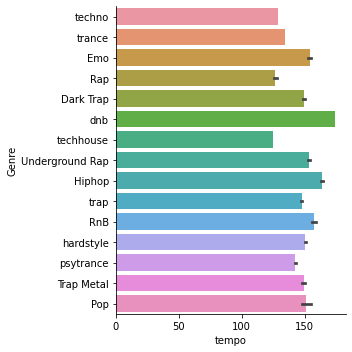

<Figure size 1440x720 with 0 Axes>

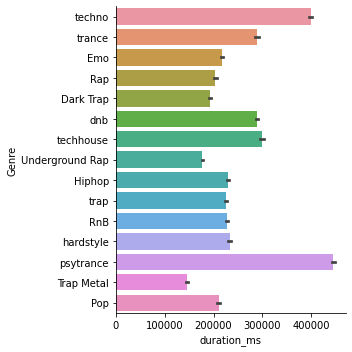

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo','duration_ms']
def plotting(feature):
    plt.figure(figsize=(20, 10))
    plot = sns.catplot(x=feature, y='genre', data=df, kind='bar')
    plot.set_ylabels('Genre')
    plt.show()
    
for x in features:
    plotting(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


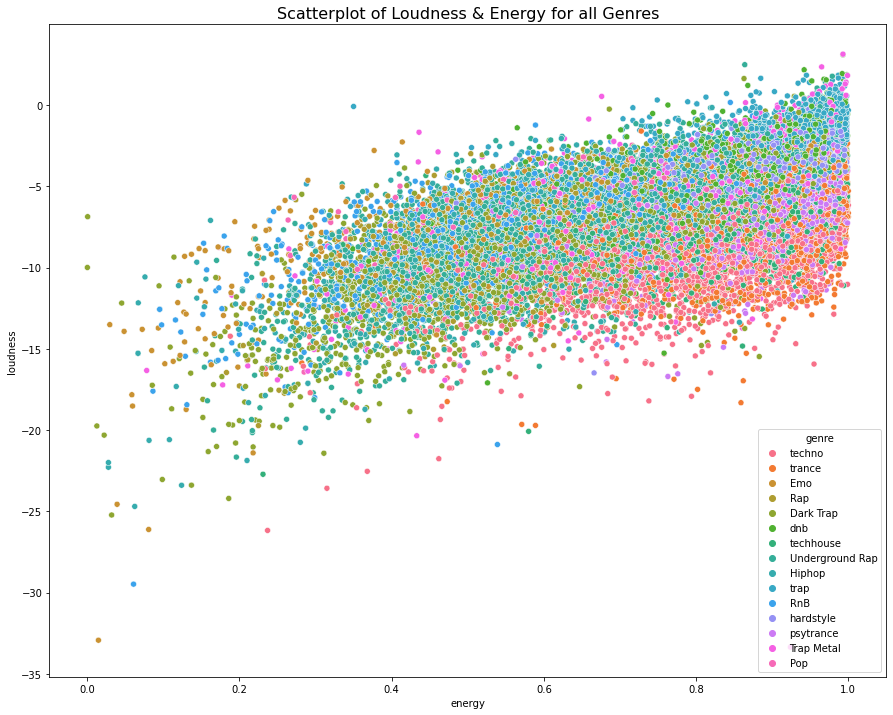

In [ ]:
plt.figure (figsize=(15, 12))
plt.title('Scatterplot of Loudness & Energy for all Genres', fontsize=16)
sns.scatterplot(df['energy'],df['loudness'],hue=df['genre'],x_bins=30);

####Outliers:

In [ ]:
# Outliers:


# Following 1.5Q1, Q3 rule for outliers
q1 = df[numeric_cols].describe().iloc[4,:]

q3 = df[numeric_cols].describe().iloc[6,:]

outliers_df = pd.DataFrame(index=df.index)

for column in numeric_cols:
    print(column)
    
    outliers_df[column] = df[column].loc[(df[column] < 1.5*q1[column]) | (df[column] > 1.5*q3[column])]

danceability
energy
loudness
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms
time_signature


In [ ]:
# This is a count of the outliers that we're dealing with

#In box plots you can see a lot of outliers, make sure to check. Outliers maybe expected as it's art.

# Out of 

outliers_count = {}

for column in outliers_df.columns:
    outliers_count[column] = round(outliers_df[column].notna().sum()*100/outliers_df.shape[0], 2)

outliers_count

{'danceability': 79.52,
 'energy': 82.79,
 'loudness': 61.8,
 'speechiness': 63.84,
 'acousticness': 48.5,
 'instrumentalness': 0.0,
 'liveness': 64.3,
 'valence': 44.06,
 'tempo': 95.54,
 'duration_ms': 72.83,
 'time_signature': 100.0}

# Setting a Baseline
Always predict the most popular genre. (IL ADDED)

In [ ]:
# df.genre.value_counts() # Underground Rap
df[df.genre=="Underground Rap"].shape[0]/df.shape[0] #15.0%

def baseline(d=df):
  num = d[d.genre=="Underground Rap"].shape[0]/d.shape[0]
  return num
baseline(df)

0.13287064135797308

#Kmeans

### Elbow Method - Finding the right amount of clusters
For Kmeans, K is the optimal number of clusters our data will be divided in. We can pick a random cluster number, but to ensure precision we use the elbow method. The elbow method creates a plot with the number of clusters on the x-axis and the total within sum of squares (WCSS) on the y-axis and then identifying where an “elbow” or bend appears in the plot.

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# creating a copy of the dataset
df_cluster = df.copy()
df_cluster.columns

X = df_cluster.drop(["genre", "key", "time_signature", "id"],axis=1)
X.head()

# X = df_cluster.drop(["song_name","analysis_url","track_href","uri","id","type","time_signature", "key", "genre"],axis=1)
#genre, key, time signature, id, 
# print(X.shape)
# X.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
26808,0.779,0.755,-10.760,0,0.0519,0.000649,0.893,0.0998,0.1410,137.012,354337
26497,0.770,0.886,-8.358,1,0.0426,0.000675,0.874,0.1010,0.2870,124.996,215040
28448,0.469,0.912,-7.610,0,0.0359,0.002180,0.823,0.2790,0.0591,138.003,240005
12438,0.553,0.717,-5.857,1,0.0318,0.000065,0.128,0.0385,0.3180,127.947,233267
14908,0.842,0.578,-6.050,0,0.1380,0.004190,0.000,0.2280,0.1900,74.496,236779


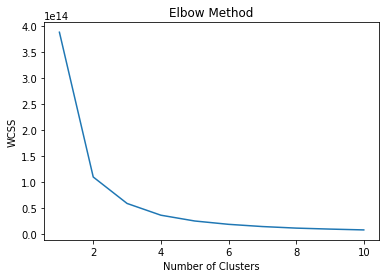

In [ ]:
# finding out the proper number of clusters
wcss = [] # Within Cluster Sum of Square
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

### Scale Features in the Range of 0-1
Many of the features have values between 0 and 1 and others have values ranging from 70-220 (Tempo) and up to 800,000 (duration_ms). We divide the dataset into train, test sets and we scale the features with the value range of 0-1. 

In [ ]:
# Normalize or scale values so that they range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = X.columns
scaled.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.773540,0.754940,0.619011,0.0,0.031626,0.000656,0.902932,0.091170,0.126174,0.476176,0.370428
1,0.763788,0.885972,0.684810,1.0,0.021553,0.000682,0.883721,0.092397,0.276798,0.400595,0.213465
2,0.437642,0.911979,0.705301,0.0,0.014297,0.002205,0.832154,0.274532,0.041680,0.482410,0.241596
3,0.528660,0.716931,0.753321,1.0,0.009856,0.000065,0.129424,0.028446,0.308780,0.419157,0.234004
4,0.841803,0.577897,0.748035,0.0,0.124878,0.004240,0.000000,0.222347,0.176725,0.082947,0.237961


In [ ]:
scaled = scaler.fit_transform(X)

We now attempt to organize our song into clusters based on common song characteritic similarities.

In [ ]:
# instantiating model
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# predict the labels of clusters. kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
label = kmeans.fit_predict(scaled)

print(label)

[2 7 2 ... 0 4 7]


In [ ]:
label_0 = X[label == 0]
label_1 = X[label == 1]
label_2 = X[label == 2]
label_3 = X[label == 3]
label_4 = X[label == 4]
label_5 = X[label == 5]
label_6 = X[label == 6]
label_7 = X[label == 7]
label_8 = X[label == 8]
label_9 = X[label == 9]


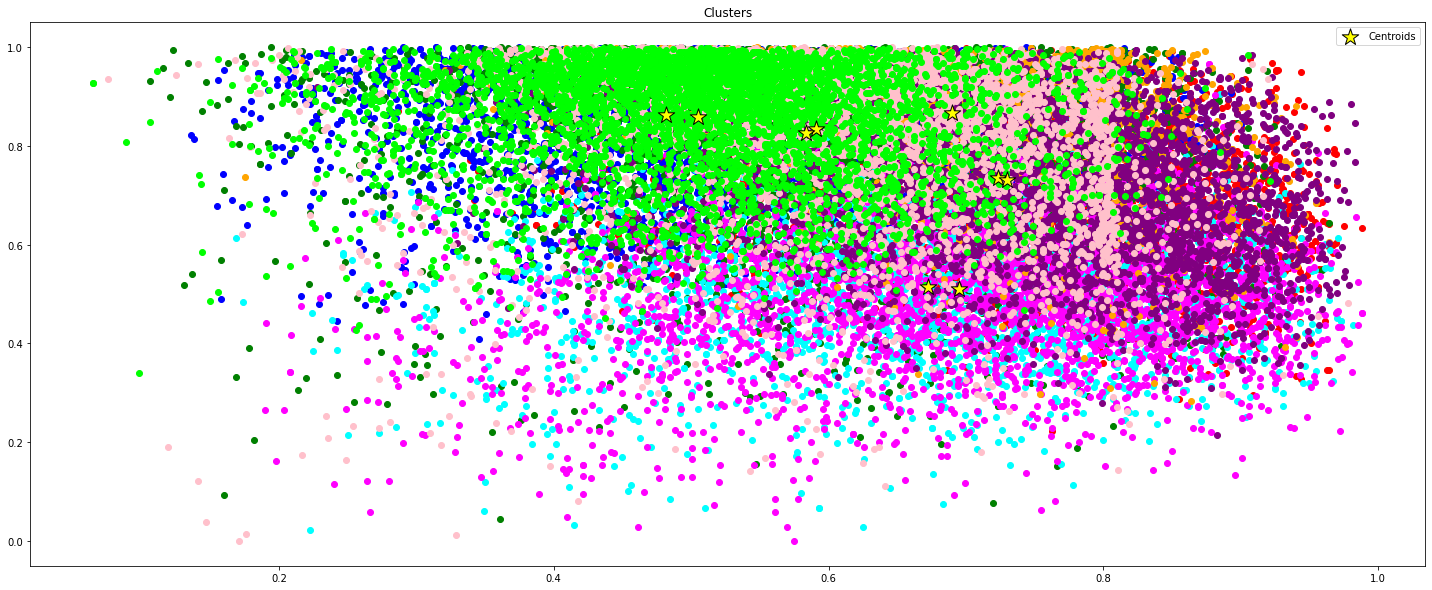

In [ ]:
## Visualize clusters in scatter plot
import matplotlib.pyplot as plt

# Filter rows of original data
filtered_label0 = df[label == 0]
cols = filtered_label0.columns

plt.figure(figsize=(25,10))
plt.scatter(label_0[cols[0]] , label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]] , label_1[cols[1]], color = 'blue')
plt.scatter(label_2[cols[0]] , label_2[cols[1]], color = 'green')
plt.scatter(label_3[cols[0]] , label_3[cols[1]], color = 'cyan')
plt.scatter(label_4[cols[0]] , label_4[cols[1]], color = 'magenta')
plt.scatter(label_5[cols[0]] , label_5[cols[1]], color = 'orange')
plt.scatter(label_6[cols[0]] , label_6[cols[1]], color = 'purple')
plt.scatter(label_7[cols[0]] , label_7[cols[1]], color = 'pink')
plt.scatter(label_8[cols[0]] , label_8[cols[1]], color = 'lime')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
#labels=np.array([kmeans.labels_])

color_dict = {0 : 'red',
                   1 : 'blue',
                   2 : 'green', 
                   3: 'cyan',
                   4: 'magenta',
                   5: 'orange',
                   6: 'purple',
                   7: 'pink',
                   8: 'lime'
                   }
#print(color_dict)
#print(label.map(color_dict))
# t = label
# t.value_counts()

# label_color = [LABEL_COLOR_MAP[l] for l in labels]
# plt.scatter(x, y, c=label_color)

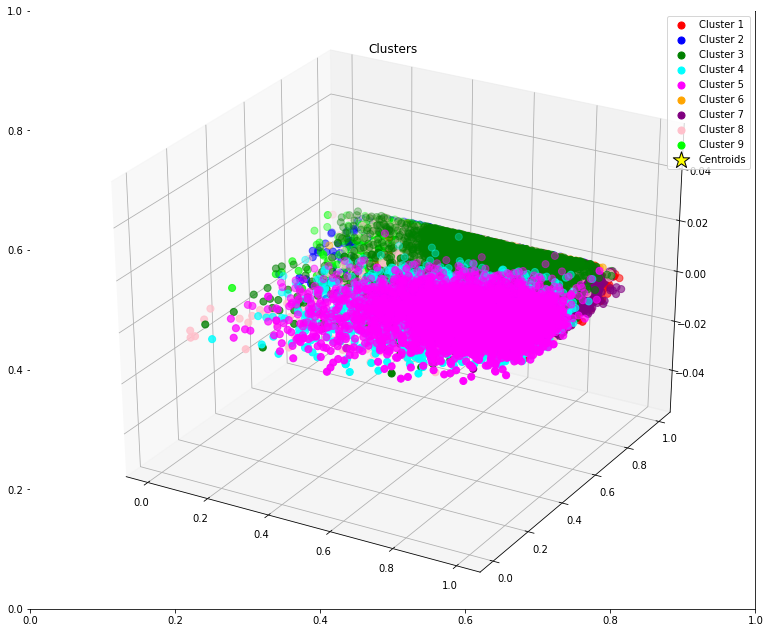

In [ ]:
## Visualize clusters in 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(scaled[label == 0,0],scaled[label == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[label == 1,0], scaled[label == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[label == 2,0], scaled[label == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[label == 3,0], scaled[label == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[label == 4,0], scaled[label == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[label == 5,0], scaled[label == 5,1], s= 50, c= 'orange', label= 'Cluster 6')
plt.scatter(scaled[label == 6,0], scaled[label == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[label == 7,0], scaled[label == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[label == 8,0], scaled[label == 8,1], s= 50, c= 'lime', label= 'Cluster 9')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
# Predictions
label

array([2, 7, 2, ..., 0, 4, 7], dtype=int32)

In [ ]:
# Convert preditcions into a dataframe
kmeans = pd.DataFrame(data=label, dtype=int)
kmeans.columns = ['K_Cluster']

# Predictions as a dataframe
print(kmeans.shape)
kmeans.head()

(35877, 1)


,K_Cluster
0,2
1,7
2,2
3,1
4,3


In [ ]:
# Concatenate the K_cluster column to the dataframe
df_cluster = pd.concat([df, kmeans], axis=1)

# Look at dataframe
print(df_cluster.shape)
df_cluster.head(10)

(41086, 16)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,K_Cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427.0,4.0,Dark Trap,7.0
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821.0,4.0,Dark Trap,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298.0,4.0,Dark Trap,3.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,0.694,0.711,8.0,-5.525,1.0,0.2210,0.0397,0.000000,0.1120,0.2830,138.049,0LLeuNBWPOg3XA73yab3PT,127524.0,3.0,Dark Trap,2.0
8,0.774,0.751,1.0,-2.445,1.0,0.1980,0.0614,0.000000,0.0728,0.1890,219.960,37gqBnUAZe8BY8WR56kDNk,140326.0,4.0,Dark Trap,1.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


###Check if our clustering/model did well

In [ ]:
# Check number of songs in each cluster
df_cluster['K_Cluster'].value_counts()

#TO DO - Include song genres with counts

2.0    5562
1.0    4918
7.0    4644
8.0    4512
6.0    4397
4.0    3730
0.0    3546
3.0    2631
5.0    1937
Name: K_Cluster, dtype: int64

In [ ]:
# Check the songs in the cluster
df_cluster.loc[df_cluster['K_Cluster'] == 4][:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,K_Cluster
18,0.812,0.813,10.0,-5.583,0.0,0.0984,0.0987,0.00015,0.0758,0.3480,128.066,3KJrwOuqiEwHq6QTreZT61,180880.0,4.0,Dark Trap,4.0
33,0.455,0.525,5.0,-12.692,0.0,0.0455,0.1360,0.73400,0.1250,0.2790,119.999,2Tu4kHEeIVFn6Re2ybm2lQ,159974.0,4.0,Dark Trap,4.0
37,0.657,0.473,1.0,-12.051,1.0,0.0368,0.2320,0.02600,0.1080,0.1530,150.029,5Njf3sGQoxQJqcR4gUbttZ,114500.0,4.0,Dark Trap,4.0
41,0.386,0.936,7.0,-5.551,1.0,0.6040,0.1010,0.00192,0.3810,0.1930,190.150,7FoW7q7uZGOHlGi9w5mUxN,197053.0,4.0,Dark Trap,4.0
61,0.571,0.865,8.0,-4.990,1.0,0.0397,0.0042,0.20700,0.0906,0.1770,150.017,3kBa1eXqkSvfCLmG8VqQ10,166426.0,4.0,Dark Trap,4.0
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
72,0.781,0.493,1.0,-7.649,1.0,0.0522,0.0717,0.58600,0.1230,0.0383,212.022,0kCfKToIFZFQQAaSQHcjRL,133747.0,4.0,Dark Trap,4.0
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
89,0.860,0.524,11.0,-4.698,1.0,0.0729,0.5780,0.96000,0.0993,0.1420,114.946,6rF4PCqJq0p4MAWgecwfIl,148939.0,4.0,Dark Trap,4.0


In [ ]:
# Statistical distribution of the data in each column, for each cluster
df_cluster.groupby("K_Cluster").describe() 

danceability                                                    \
                 count      mean       std     min     25%    50%    75%   
K_Cluster                                                                  
0.0             3014.0  0.657232  0.153068  0.1160  0.5490  0.672  0.779   
1.0             4213.0  0.655044  0.153193  0.1410  0.5520  0.667  0.775   
2.0             4741.0  0.654757  0.153115  0.0753  0.5480  0.667  0.778   
3.0             2233.0  0.662390  0.152411  0.1370  0.5540  0.677  0.781   
4.0             3203.0  0.654065  0.154484  0.1060  0.5480  0.667  0.775   
5.0             1659.0  0.645230  0.151199  0.1190  0.5435  0.655  0.764   
6.0             3814.0  0.658555  0.151126  0.1250  0.5490  0.670  0.782   
7.0             3923.0  0.656890  0.150646  0.0651  0.5520  0.667  0.776   
8.0             3868.0  0.651703  0.154773  0.0651  0.5440  0.660  0.773   

                  energy            ... duration_ms           time_signature  \
             max   count      mean  ...         75%       max          count   
K_Cluster                           ...                                        
0.0        0.977  3014.0  0.737378  ...   309703.25  667688.0         3014.0   
1.0        0.988  4213.0  0.742096  ...   311304.00  683240.0         4213.0   
2.0        0.983  4741.0  0.745827  ...   321739.00  894386.0         4741.0   
3.0        0.975  2233.0  0.737941  ...   307660.00  821168.0         2233.0   
4.0        0.970  3203.0  0.743481  ...   324546.50  646142.0         3203.0   
5.0        0.981  1659.0  0.741974  ...   316774.00  847302.0         1659.0   
6.0        0.988  3814.0  0.739814  ...   308234.00  913052.0         3814.0   
7.0        0.977  3923.0  0.742074  ...   310764.00  757972.0         3923.0   
8.0        0.975  3868.0  0.734670  ...   304645.75  855502.0         3868.0   

                                                        
               mean       std  min  25%  50%  75%  max  
K_Cluster                                               
0.0        3.964499  0.307664  1.0  4.0  4.0  4.0  5.0  
1.0        3.971754  0.281445  1.0  4.0  4.0  4.0  5.0  
2.0        3.967096  0.293699  1.0  4.0  4.0  4.0  5.0  
3.0        3.976265  0.244786  1.0  4.0  4.0  4.0  5.0  
4.0        3.975648  0.259787  1.0  4.0  4.0  4.0  5.0  
5.0        3.963834  0.318158  1.0  4.0  4.0  4.0  5.0  
6.0        3.969848  0.299283  1.0  4.0  4.0  4.0  5.0  
7.0        3.966352  0.302783  1.0  4.0  4.0  4.0  5.0  
8.0        3.972079  0.280835  1.0  4.0  4.0  4.0  5.0  

[9 rows x 104 columns]

Observations from the clusers:


*   Highest clusters were number 2. 
* 



# Logistic Regression

IL Added

In [ ]:
df.head()
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
26808,0.779,0.755,11,-10.760,0,0.0519,0.000649,0.893000,0.0998,0.1410,137.012,001dY1wrXF0Vfo40Kkqv4R,354337,4,techno
26497,0.770,0.886,1,-8.358,1,0.0426,0.000675,0.874000,0.1010,0.2870,124.996,001rJKlws3dVKuURJQdnIk,215040,4,techno
28448,0.469,0.912,5,-7.610,0,0.0359,0.002180,0.823000,0.2790,0.0591,138.003,00349h1hy2raWiakxSDfsU,240005,4,trance
12438,0.553,0.717,7,-5.857,1,0.0318,0.000065,0.128000,0.0385,0.3180,127.947,003FTlCpBTM4eSqYSWPv4H,233267,4,Emo
14908,0.842,0.578,6,-6.050,0,0.1380,0.004190,0.000000,0.2280,0.1900,74.496,003VDDA7J3Xb2ZFlNx7nIZ,236779,4,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21037,0.614,0.713,1,-4.213,1,0.1520,0.296000,0.000009,0.3670,0.6370,170.095,7zrH5Yxm0GYeQAKyy4ctp5,183572,4,Hiphop
36244,0.731,0.888,1,-5.105,1,0.3040,0.001930,0.020500,0.1710,0.5880,142.117,7zs4U1U5Rbj5k7nQ1vuuGF,325352,4,trap
17664,0.772,0.673,4,-6.082,0,0.2400,0.273000,0.000009,0.4750,0.7780,119.971,7zw5QFPrerWf8XzZW70z3L,281187,4,RnB
20597,0.729,0.567,9,-7.333,1,0.1540,0.353000,0.000000,0.2360,0.3430,130.942,7zxtj0SKcfBMYWnf7nYrsG,169587,4,Hiphop


In [ ]:
df.genre.value_counts()

Underground Rap    4767
Dark Trap          4014
trance             2804
psytrance          2650
Hiphop             2633
techno             2631
dnb                2503
trap               2360
hardstyle          2351
techhouse          2223
RnB                1920
Emo                1647
Trap Metal         1509
Rap                1442
Pop                 423
Name: genre, dtype: int64

In [ ]:
df.genre.value_counts()/df.shape[0]

Underground Rap    0.132871
Dark Trap          0.111882
trance             0.078156
psytrance          0.073863
Hiphop             0.073390
techno             0.073334
dnb                0.069766
trap               0.065780
hardstyle          0.065529
techhouse          0.061962
RnB                0.053516
Emo                0.045907
Trap Metal         0.042060
Rap                0.040193
Pop                0.011790
Name: genre, dtype: float64

In [ ]:
genre_dict = {"Dark Trap": 0,
             "Underground Rap": 1,
             "Trap Metal": 2,
             "Emo": 3,
             "Rap": 4,
             "RnB": 5,
             "Pop": 6,
             "Hiphop": 7,
             "techhouse": 8,
             "techno": 9,
             "trance": 10,
             "psytrance": 11,
             "trap": 12,
             "dnb": 13,
             "hardstyle": 14}
df["genre"] = [genre_dict[i] for i in df["genre"]]

In [ ]:
genre_dict = {0: "Dark Trap",
             1: "Underground Rap",
             2: "Trap Metal",
             3: "Emo",
             4: "Rap",
             5: "RnB",
             6: "Pop",
             7: "Hiphop",
             8: "techhouse",
             9: "techno",
             10: "trance",
             11: "psytrance",
             12: "trap",
             13: "dnb",
             14: "hardstyle"}

In [ ]:
df.genre.value_counts()

1     4767
0     4014
10    2804
11    2650
7     2633
9     2631
13    2503
12    2360
14    2351
8     2223
5     1920
3     1647
2     1509
4     1442
6      423
Name: genre, dtype: int64

In [ ]:
# ## fix the imbalance in the dataset

# Three options
# ## 1: Take 80% of the genre found the least often
# ## 2: Ignore the least popular genre and take 1500 from the rest
# ## 3: Stratisfy into training and test so similar proportions

# ### OPTIONS 1&2:
np.random.seed(1234)

n = int(round(df[df["genre"]==6].shape[0]*.8,0))
n

# randomly sample (# that is 80% of the count of the least occuring genre) rows from every genre
for i in range(len(df.genre.unique())):
  if i==6:
    continue
  else:
    fcn = "imbalanced_"+str(i)+" = df[df.genre=="+str(i)+"].sample(n=1400)" #sample(n=n) #sample(n=1500)
    exec(fcn)

imbalanced = pd.concat([imbalanced_0,imbalanced_1,imbalanced_2,imbalanced_3,
                       imbalanced_4,imbalanced_5,imbalanced_7, #,imbalanced_6
                       imbalanced_8,imbalanced_9,imbalanced_10,imbalanced_11,
                       imbalanced_12,imbalanced_13,imbalanced_14])
imbalanced

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
4277,0.439,0.893,2,-3.255,1,0.1060,0.02050,0.609000,0.1990,0.2440,149.989,7a8GCLsDNf8Ydm7K9ljptF,242312,4,0
925,0.694,0.850,8,-4.261,1,0.1700,0.02370,0.000000,0.1350,0.7070,139.996,4dV1HBPBIwqQFO98BX9B0k,112039,4,0
2968,0.658,0.364,3,-12.461,0,0.0431,0.02560,0.842000,0.0781,0.0350,219.996,68MTAmSgtNgA7tBpdhyNRE,296841,4,0
4276,0.484,0.844,11,-3.376,1,0.0662,0.01360,0.387000,0.2930,0.0766,155.008,44Tj4Q3SgFIWQjz7M5WFBL,217956,4,0
2590,0.462,0.414,7,-10.485,1,0.0346,0.83600,0.308000,0.1280,0.0568,134.998,6JLM7B4oxz28i4YsQuKgi9,370363,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39863,0.555,0.797,11,-2.265,1,0.0527,0.16100,0.000000,0.0709,0.1590,150.046,0bW9fTSYLnaCJwkYIsfZ4B,294700,4,14
40492,0.519,0.918,1,-4.005,1,0.0909,0.00829,0.446000,0.3920,0.2670,150.026,66z9xAxVqFdLsTT4FzgV85,329598,4,14
42257,0.459,0.914,7,-5.226,1,0.0613,0.00362,0.426000,0.1760,0.1770,149.693,1O18K3V5Aj9jGux7VnKolj,243604,4,14
41928,0.351,0.912,4,-3.396,0,0.0850,0.03270,0.000322,0.5080,0.0627,150.008,06kSBWCsizE75Z2h4yjVPM,248000,4,14


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df_data_normalized = scaler.fit_transform(imbalanced.iloc[:,0:11])
df_data_normalized

df_normalized = pd.DataFrame(df_data_normalized, columns = list(imbalanced.columns[0:11]))
df_normalized
dtrain_x, dtest_x, dtrain_y, dtest_y = train_test_split(df_normalized.iloc[:,0:14], imbalanced.iloc[:,14], train_size = 0.8, random_state=1)

In [ ]:
df.genre.value_counts().sort_index()/df.shape[0]

0     0.111882
1     0.132871
2     0.042060
3     0.045907
4     0.040193
5     0.053516
6     0.011790
7     0.073390
8     0.061962
9     0.073334
10    0.078156
11    0.073863
12    0.065780
13    0.069766
14    0.065529
Name: genre, dtype: float64

In [ ]:
np.random.seed(0)
shuffled = imbalanced.sample(frac=1)
shuffled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
34647,0.561,0.934,4,-3.277,0,0.1310,0.043000,0.381000,0.2100,0.313,150.052,6sGleW87thKd9ktkanYp54,255000,4,12
14803,0.939,0.632,1,-2.978,1,0.1370,0.060600,0.001360,0.1010,0.364,133.979,4T2dHb8XBYHlVj7Dyo1cW9,157645,4,4
19817,0.708,0.807,11,-8.195,0,0.0444,0.001820,0.000157,0.1240,0.860,129.968,2T42itxS9f1ijygkLOLGOe,211853,4,7
11211,0.686,0.868,0,-7.751,0,0.1140,0.324000,0.002560,0.1010,0.731,150.027,6ABkFT87IipK2KQWBFFcoo,134830,4,2
5352,0.866,0.503,9,-9.157,1,0.1910,0.003860,0.000000,0.0615,0.329,106.036,69SfOoApml3jcasmWxktfr,233347,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21503,0.701,0.760,9,-6.561,1,0.0512,0.496000,0.000000,0.0867,0.301,183.972,0prF3F4FoKvxBObaeXLVHv,248560,4,7
29818,0.536,0.913,10,-7.851,1,0.0575,0.002100,0.360000,0.3260,0.176,125.821,2b7FCIUadWlK71jILSoRDB,305187,4,10
22113,0.800,0.800,2,-5.052,1,0.0493,0.000007,0.890000,0.0944,0.222,123.989,2mSQ4PAlGEuyLyaBqw9QKF,340645,4,8
21928,0.655,0.893,7,-5.127,1,0.0428,0.002430,0.008880,0.1240,0.538,123.992,38MbUy2C0FLv6exayPlImu,178823,4,8


In [ ]:
shuffled = shuffled.set_index("id")
shuffled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
id,,,,,,,,,,,,,,
6sGleW87thKd9ktkanYp54,0.561,0.934,4,-3.277,0,0.1310,0.043000,0.381000,0.2100,0.313,150.052,255000,4,12
4T2dHb8XBYHlVj7Dyo1cW9,0.939,0.632,1,-2.978,1,0.1370,0.060600,0.001360,0.1010,0.364,133.979,157645,4,4
2T42itxS9f1ijygkLOLGOe,0.708,0.807,11,-8.195,0,0.0444,0.001820,0.000157,0.1240,0.860,129.968,211853,4,7
6ABkFT87IipK2KQWBFFcoo,0.686,0.868,0,-7.751,0,0.1140,0.324000,0.002560,0.1010,0.731,150.027,134830,4,2
69SfOoApml3jcasmWxktfr,0.866,0.503,9,-9.157,1,0.1910,0.003860,0.000000,0.0615,0.329,106.036,233347,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0prF3F4FoKvxBObaeXLVHv,0.701,0.760,9,-6.561,1,0.0512,0.496000,0.000000,0.0867,0.301,183.972,248560,4,7
2b7FCIUadWlK71jILSoRDB,0.536,0.913,10,-7.851,1,0.0575,0.002100,0.360000,0.3260,0.176,125.821,305187,4,10
2mSQ4PAlGEuyLyaBqw9QKF,0.800,0.800,2,-5.052,1,0.0493,0.000007,0.890000,0.0944,0.222,123.989,340645,4,8


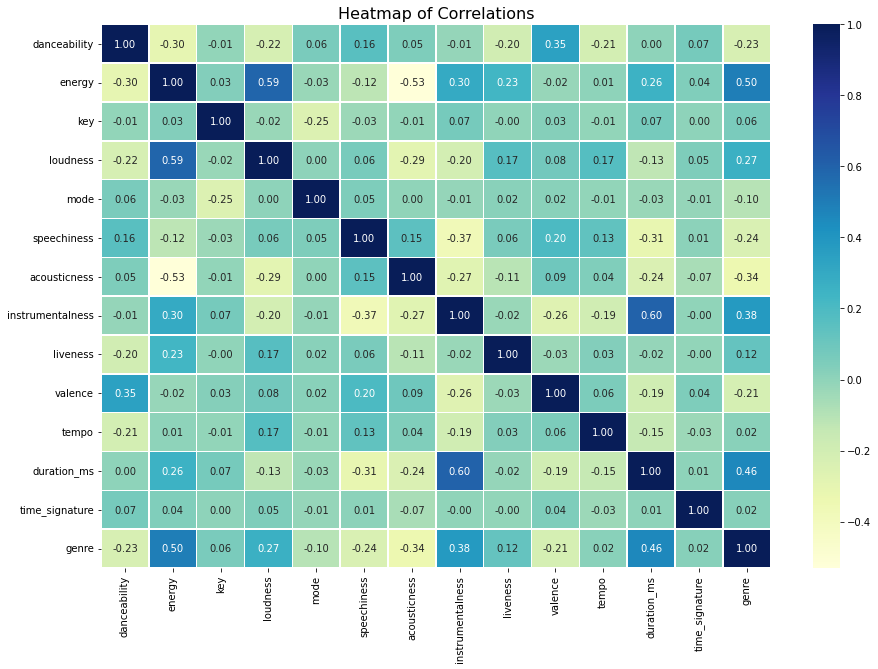

In [ ]:
correlation_mat_genre =shuffled.corr() # [numeric_columns]
fig, ax = plt.subplots(figsize=(15,10))   
plt.title('Heatmap of Correlations', fontsize=16)
sns.heatmap(correlation_mat_genre, annot = True, ax=ax, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [ ]:
colnames = {
    0: "danceability",
    1: "energy",
    2: "key",
    3: "loudness",
    4: "mode",
    5: "speechiness",
    6: "acousticness",
    7: "instrumentalness",
    8: "liveness",
    9: "valence",
    10: "tempo",
    11: "duration_ms",
    12: "time_signature",
    13: "genre"
}

In [ ]:
shuffled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
id,,,,,,,,,,,,,,
6sGleW87thKd9ktkanYp54,0.561,0.934,4,-3.277,0,0.1310,0.043000,0.381000,0.2100,0.313,150.052,255000,4,12
4T2dHb8XBYHlVj7Dyo1cW9,0.939,0.632,1,-2.978,1,0.1370,0.060600,0.001360,0.1010,0.364,133.979,157645,4,4
2T42itxS9f1ijygkLOLGOe,0.708,0.807,11,-8.195,0,0.0444,0.001820,0.000157,0.1240,0.860,129.968,211853,4,7
6ABkFT87IipK2KQWBFFcoo,0.686,0.868,0,-7.751,0,0.1140,0.324000,0.002560,0.1010,0.731,150.027,134830,4,2
69SfOoApml3jcasmWxktfr,0.866,0.503,9,-9.157,1,0.1910,0.003860,0.000000,0.0615,0.329,106.036,233347,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0prF3F4FoKvxBObaeXLVHv,0.701,0.760,9,-6.561,1,0.0512,0.496000,0.000000,0.0867,0.301,183.972,248560,4,7
2b7FCIUadWlK71jILSoRDB,0.536,0.913,10,-7.851,1,0.0575,0.002100,0.360000,0.3260,0.176,125.821,305187,4,10
2mSQ4PAlGEuyLyaBqw9QKF,0.800,0.800,2,-5.052,1,0.0493,0.000007,0.890000,0.0944,0.222,123.989,340645,4,8


In [ ]:
f80 = int(round(len(shuffled)*.8,0))

dtrain_x = shuffled[shuffled.columns[[1,7]]][:f80]
dtrain_y = shuffled[shuffled.columns[[13]]][:f80]
dtest_x = shuffled[shuffled.columns[[1,7]]][f80:]
dtest_y = shuffled[shuffled.columns[[13]]][f80:]

dtrain_x

,energy,instrumentalness
id,,
6sGleW87thKd9ktkanYp54,0.934,0.381000
4T2dHb8XBYHlVj7Dyo1cW9,0.632,0.001360
2T42itxS9f1ijygkLOLGOe,0.807,0.000157
6ABkFT87IipK2KQWBFFcoo,0.868,0.002560
69SfOoApml3jcasmWxktfr,0.503,0.000000
...,...,...
1HjFr4rMoK7lB2tolsrCCt,0.474,0.000000
0oTUjZ4WrHkVS3x08SzZOi,0.868,0.000019
6gsIHYdGIzmJICdIZGsrQI,0.899,0.206000


In [ ]:
### Option 3 for imbalance

# (df.genre.value_counts().sort_index())/df.shape[0]
np.random.seed(1234)
df2 = df.sample(frac=1)
df2


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df_data_normalized = scaler.fit_transform(df2.iloc[:,0:11])

df_normalized = pd.DataFrame(df_data_normalized, columns = list(df2.columns[0:11]))
df_normalized = df2.assign(genre=df2.genre)
df_normalized
# dtrain_x, dtest_x, dtrain_y, dtest_y = train_test_split(df_normalized.iloc[:,0:14], imbalanced.iloc[:,14], train_size = 0.8, random_state=1)


for i in range(len(df_normalized.genre.unique())):
  eightypercent = int(round((df_normalized[df_normalized.genre==i].shape[0])*.8,0))
  fcn1 = "train_"+str(i)+" = df_normalized[df_normalized.genre=="+str(i)+"].sample(n=eightypercent)"
  exec(fcn1)

training = pd.concat([train_0,train_1,train_2,train_3,
                       train_4,train_5,train_6,train_7, #
                       train_8,train_9,train_10,train_11,
                       train_12,train_13,train_14])
training.genre.value_counts().sort_index()/training.shape[0]
training.shape
test = df_normalized[~df_normalized.id.isin(training.id)]
test.genre.value_counts().sort_index()/test.shape[0]
test

dtrain_x = training[training.columns[[1,7]]]
dtrain_y = training[training.columns[[13]]]
dtest_x = test[test.columns[[1,7]]]
dtest_y = test[test.columns[[13]]]

dtrain_x

,energy,instrumentalness
4051,0.927,0.000005
1031,0.282,0.102000
984,0.495,0.000000
3717,0.607,0.140000
3789,0.570,0.070000
...,...,...
40017,0.902,0.001390
40983,0.925,0.003150
39443,0.833,0.743000
40330,0.835,0.052700


In [ ]:
df_normalized.genre.value_counts(dropna=False).sort_index()

0     4014
1     4767
2     1509
3     1647
4     1442
5     1920
6      423
7     2633
8     2223
9     2631
10    2804
11    2650
12    2360
13    2503
14    2351
Name: genre, dtype: int64

In [ ]:
df2.genre.value_counts(dropna=False).sort_index()

0     4014
1     4767
2     1509
3     1647
4     1442
5     1920
6      423
7     2633
8     2223
9     2631
10    2804
11    2650
12    2360
13    2503
14    2351
Name: genre, dtype: int64

In [ ]:
dtrain_y

,time_signature
4051,4
1031,4
984,4
3717,4
3789,4
...,...
40017,4
40983,4
39443,4
40330,4


In [ ]:
X_train = np.array(dtrain_x).astype('float32')
Y_train = np.array(dtrain_y)

X_test = np.array(dtest_x).astype('float32')
Y_test = np.array(dtest_y)

In [ ]:
X_train

array([[9.27e-01, 4.97e-06],
       [2.82e-01, 1.02e-01],
       [4.95e-01, 0.00e+00],
       ...,
       [8.33e-01, 7.43e-01],
       [8.35e-01, 5.27e-02],
       [9.52e-01, 6.98e-01]], dtype=float32)

In [ ]:
Y_train

array([[4],
       [4],
       [4],
       ...,
       [4],
       [4],
       [4]])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(
    units=15,                    # output dim
    input_shape=[len(X_train[0])],             # input dim
    use_bias=False,              # we included the bias in X
    activation='softmax',        # apply a sigmoid to the output
    kernel_initializer=tf.ones_initializer  # initialize params to 1
))

model.add(tf.keras.layers.Dense(
    units = 15))

model.add(tf.keras.layers.Dense(
    units = 15))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])


### SHUO'S
def build_model(n_classes, learning_rate = 0.01):
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(
      units=n_classes,
      activation='softmax'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer = optimizer,
                metrics=['accuracy'])
  return model

model = build_model(df['genre'].nunique(), 0.01)
history = model.fit(
    x = X_train,
    y = Y_train,
    epochs = 5,
    batch_size = 64, 
    validation_split=0.1,
    verbose =1)

history = pd.DataFrame(history.history)
display(history)
test_predictions = np.argmax(model.predict(X_test), axis = -1)
accuracy = np.mean(test_predictions == Y_test)
print(f'accuracy: {accuracy}')

In [ ]:
# As above, get predictions for the current model first.
np.random.seed(12345)
preds = model.predict(X_train)

# Do a single gradient update.
history = model.fit(
  x = X_train,
  y = Y_train,
  epochs=20,
  batch_size=64,
  verbose=0)

# Show the loss (before the update) and the new weights.
loss = history.history['loss'][0]
weights = model.layers[0].get_weights()[0].T
# print('predictions:\n', preds[:6])
print('loss:', loss)
# print('W:\n', weights)

test_preds = model.predict(X_test)
test_preds_labels = np.argmax(test_preds, axis=1)
accuracy = np.mean(test_preds_labels == Y_test)
print(f'accuracy: {accuracy}')

897/897 [==============================] - 1s 1ms/step
loss: 3.278717517852783
225/225 [==============================] - 0s 1ms/step
accuracy: 0.0


In [ ]:
pd.DataFrame(test_preds_labels).value_counts()

14    7176
dtype: int64

In [ ]:
xx = model.evaluate(X_test, Y_test)
xx

225/225 [==============================] - 1s 1ms/step - loss: 2.7080 - accuracy: 0.0000e+00


[2.7080488204956055, 0.0]

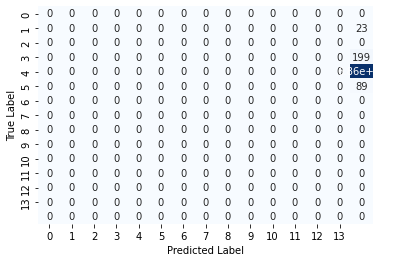

In [ ]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(Y_test, test_preds_labels)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=colnames, yticklabels=colnames, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

# Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 500 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.1


In [ ]:
# accuracy = correct / total
accuracy = np.sum(np.round(predictions,0)==Y_test)/Y_test.shape[0]
accuracy

6773.94955406912

In [ ]:
np.sum(np.round(predictions,0)==Y_test) #1168261
Y_test.shape[0] #4200

7176